In [214]:
import numpy as np
import matplotlib.pyplot as plt

In [215]:
# compute convolution by flipping one sequence and shifting to the right using np.roll
def circular_convolution(x,h,n):
    
    len_req = len(x) + len(h)
    
#     # pad x and h sequences with zeros to match length M+N
#     x = np.pad(x, (0, len_req-len(x)), 'constant', constant_values=(0))
#     h = np.pad(h, (0, len_req-len(h)), 'constant', constant_values=(0))
    
    h_flipped = np.flip(h)
    y = []
    
    for k in range(n):
#         print('k: ',k)
#         print('h flipped: ',h_flipped)
#         print('x        : ',x, "\n")
    
        val = 0
        h_flipped = np.roll(h_flipped,1)
        
        val = np.dot(h_flipped, x)
        y.append(val)
        
    return y

## Oppenheim interpretation 1

Consider two sequences. Imagine wrapping the two input sequence around cylinders, the 2nd sequence should be flipped before wrapping.

If we view the sequence as an unwrapped flat version while rotating, the number at the far right end appears at beginning of the sequence after one step of rotation. This is called a *circular shift*.  Thus, signals repeat infinitely as the cylinder is rotated

<StemContainer object of 3 artists>

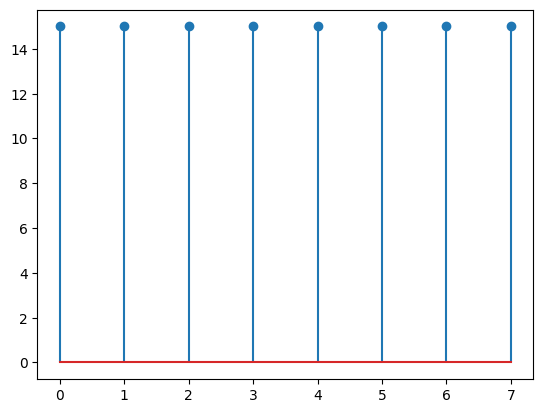

In [249]:
# Linear convolution implemented manually  
# Linear convolution 
x = [1,1,1,1,1,1,1,1,1]
h = [5,4,3,2,1,0,0,0,0]

y = circular_convolution(x,h,8)
plt.stem(y)

<StemContainer object of 3 artists>

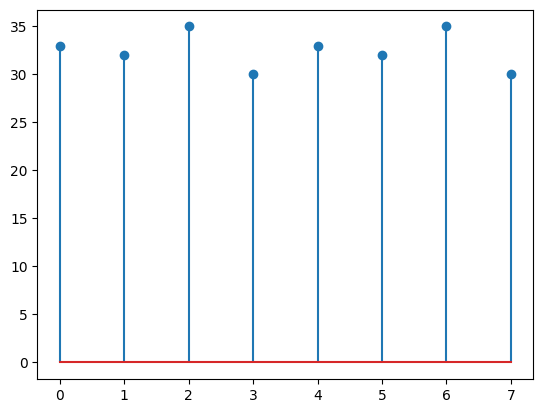

In [250]:
# Linear convolution implemented manually  
# Linear convolution 
x = [4,3,4,2]
h = [4,3,2,1]

y = circular_convolution(x,h,8)
plt.stem(y)

# Relationship between Linear Convolution and Periodic convolution

Compute the linear convolution

<StemContainer object of 3 artists>

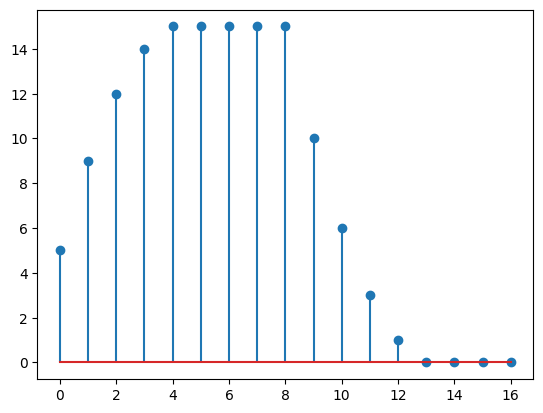

In [241]:
x = [1,1,1,1,1,1,1,1,1]
h = [5,4,3,2,1,0,0,0,0]

y = np.convolve(x,h)
plt.stem(y)

Seperate the first $M$ values

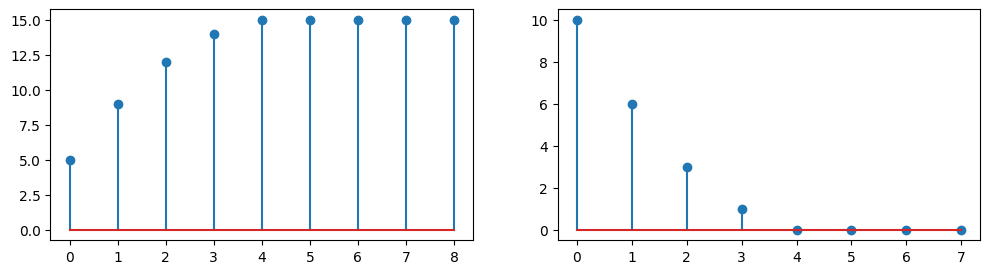

In [242]:
M = len(x)
y1 = y[0 : M]
y2 = y[M : y.shape[0]]

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.stem(y1)

plt.subplot(1, 2, 2)
plt.stem(y2)

plt.show()

Add the 2 signal. This will be a contant value and equals the output of the periodic convolution

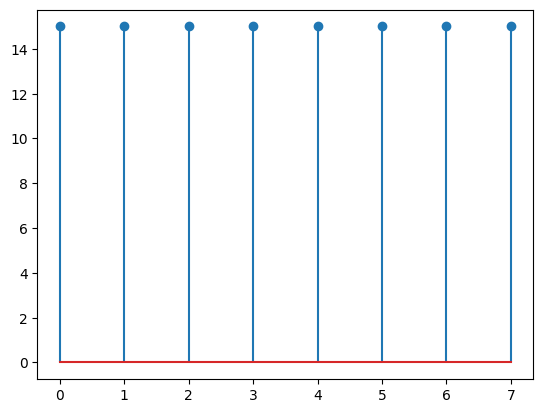

In [243]:
y_combined = y1[0:y2.shape[0]] +y2

plt.stem(y_combined)
plt.show()

# Obtaining linear convolution from circular convolution by padding with zeros

The 2 signals are padded with zeros befire convolving

In [244]:
# compute convolution by flipping one sequence and shifting to the right using np.roll
def circular_convolution_padded(x,h,n):
    
    len_req = len(x) + len(h)
    
    # pad x and h sequences with zeros to match length M+N
    x = np.pad(x, (0, len_req-len(x)), 'constant', constant_values=(0))
    h = np.pad(h, (0, len_req-len(h)), 'constant', constant_values=(0))
    
    h_flipped = np.flip(h)
    y = []
    
    for k in range(n):
        h_flipped = np.roll(h_flipped,1)
#         print('k: ',k)
#         print('h flipped: ',h_flipped)
#         print('x        : ',x, "\n")
    
        val = 0
        val = np.dot(h_flipped, x)
        y.append(val)
        
    return y

Now, the circular convolution exactly matches the linear convolution

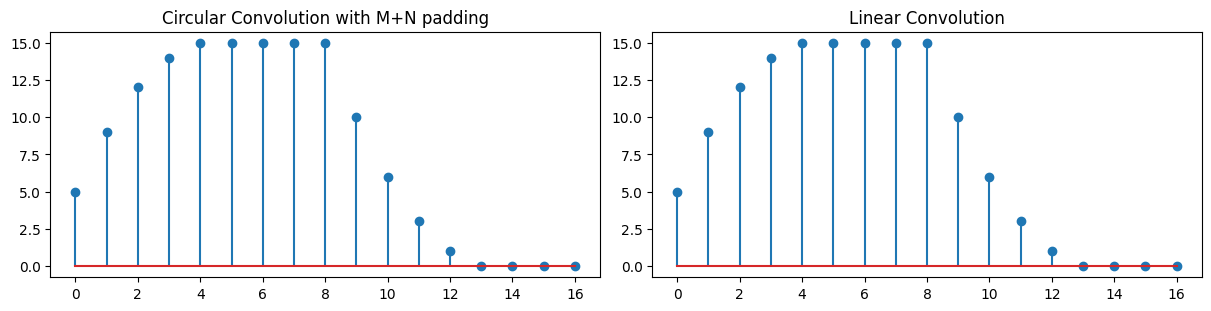

In [251]:
# Linear convolution implemented manually  
# Linear convolution 
x = [1,1,1,1,1,1,1,1,1]
h = [5,4,3,2,1,0,0,0,0]

y = circular_convolution_padded(x,h,17)

fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 3))

axs[0].stem(y)
axs[0].set_title('Circular Convolution with M+N padding')

axs[1].stem(np.convolve(x,h))
axs[1].set_title('Linear Convolution')

plt.show()

# Circular convolution using DFT

Circular-convolution in the time doman is equivalent to multiplication of the DFT coefficients. So, it can be computed by:

1. padding the input sequence with zeros so that both the input sequences are of length $M +N$
2. taking the DFT of the input sequences and multiplying the DFT coefficients
3. taking the inverse DFT

This is useful for implementing a digital filter by explicit computation of the DFT, wherein we need to do linear convolution of the inout signal and the filter

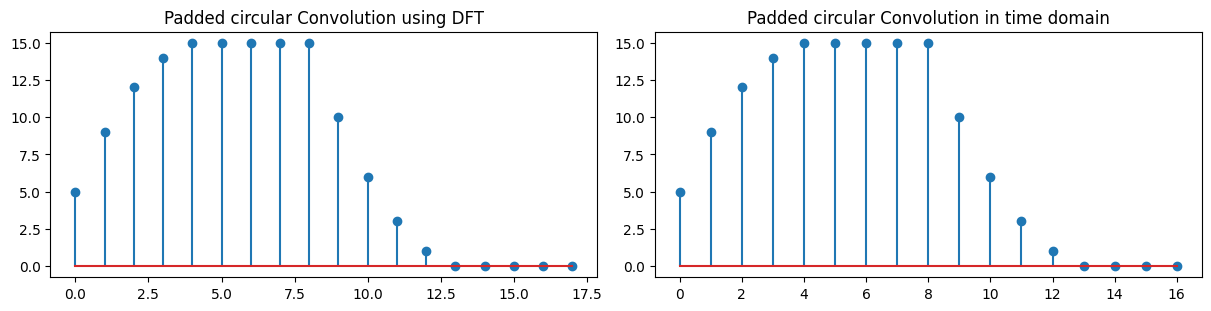

In [252]:
x = [1,1,1,1,1,1,1,1,1]
h = [5,4,3,2,1,0,0,0,0]

# padding the input sequence with zeros so that both the input sequences are of length $M +N$
len_reqd = len(x) + len(h)
x_padded = np.pad(x, (0, len_reqd - len(x)), 'constant', constant_values=(0))
h_padded = np.pad(h, (0, len_reqd - len(h)), 'constant', constant_values=(0))

# take DFT of zero-padded input sequence
X_k = np.fft.fft(x_padded)
H_k = np.fft.fft(h_padded)

# multiply the input sequences in the frequency domain and take the inverse DFT
dft_circle_conv = np.fft.ifft(X_k*H_k)

fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 3))

axs[0].stem(abs(dft_circle_conv))
axs[0].set_title('Padded circular Convolution using DFT')

axs[1].stem(circular_convolution_padded(x,h,17))
axs[1].set_title('Padded circular Convolution in time domain')

plt.show()


## Oppenheim interpretation 2

<StemContainer object of 3 artists>

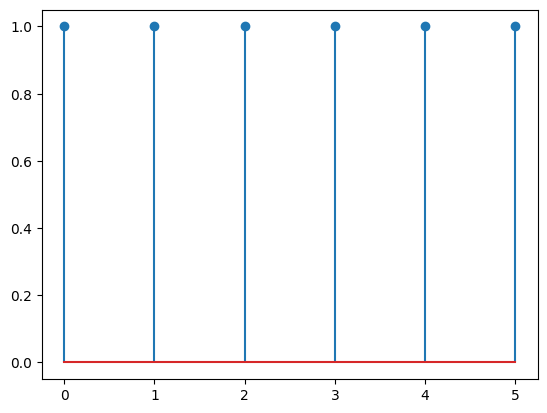

In [4]:
x = np.array([1,1,1,1,1,1])
t = np.arange(0,x.size)
plt.stem(t, x)

Do a linear convolution of the signal with itself

<StemContainer object of 3 artists>

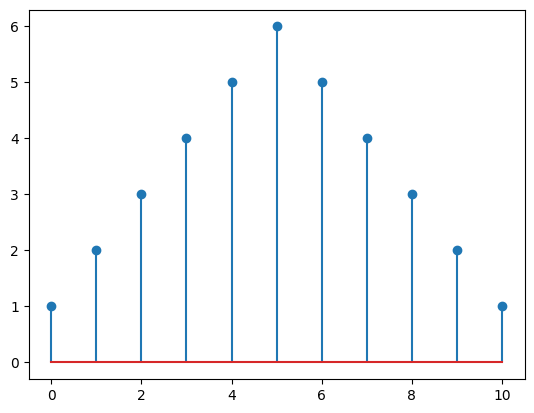

In [5]:
x_conv = np.convolve(x,x)
plt.stem(x_conv)

Extend the resulting sequence periodically by repeatedly adding it’s own replicas that’s sifted by $N$, $2N$, $3N$ etc , where $N$ is the period of the original sequence. Here, we add only a finite number of replicas

<StemContainer object of 3 artists>

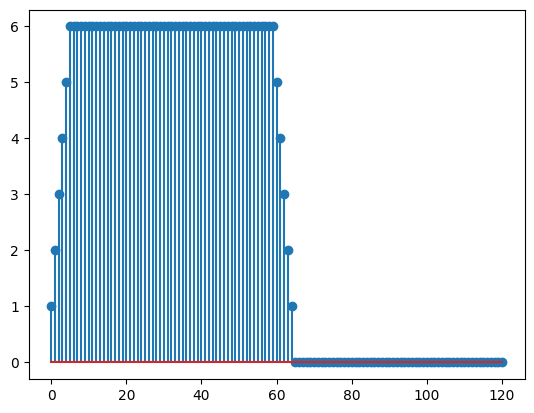

In [6]:
no_of_replicas = 10
N = x.size
len_ = x_conv.shape[0]*(no_of_replicas+1)
t = np.arange(0, len_)


# Initialization
x_conv_extended = np.pad(x_conv, (0, len_ - x_conv.size), 'constant', constant_values=(0))
x_conv_inf = x_conv_extended

# add shifted replicas of the signal to itself
for i in range(no_of_replicas-1):
    x_conv_inf = x_conv_inf + np.roll(x_conv_extended,N*(i+1))

plt.stem(t, x_conv_inf)

To get the result of the circular convolution, extract a subset with the same length as the original signal

<StemContainer object of 3 artists>

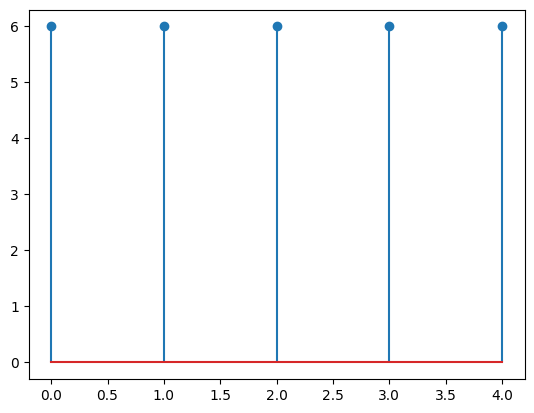

In [7]:
x_circle_conv = x_conv_inf[x_conv.shape[0]+1:x_conv.shape[0]+N]
plt.stem(x_circle_conv)

Now,add replicas sifted by multiples $2N$ instead of $N$

<StemContainer object of 3 artists>

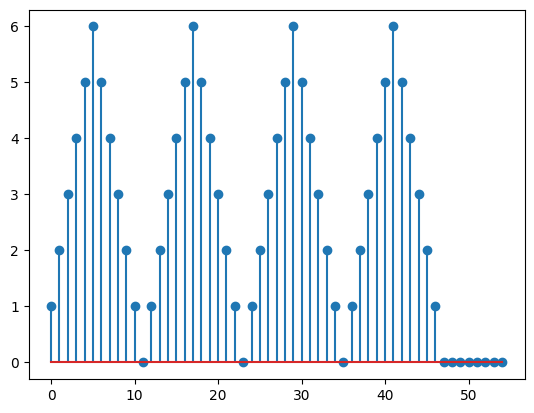

In [8]:
no_of_replicas = 4
N = x.size
len_ = x_conv.shape[0]*(no_of_replicas+1)
t = np.arange(0, len_)

# Initialization
x_conv_extended = np.pad(x_conv, (0, len_ - x_conv.size), 'constant', constant_values=(0))
x_conv_inf = x_conv_extended

# add shifted replicas of the signal to itself
for i in range(no_of_replicas-1):
    x_conv_inf = x_conv_inf + np.roll(x_conv_extended,2*N*(i+1))

plt.stem(t, x_conv_inf)

To get the result of the $2N$ circular convolution, extract a subset with the same length as the 2 times original signal. Here, we notice that the result of the circular convolution is same as that of the linear convolution

This is becuase the window size = $2N$ was larger than the length of the linear convolution sequence. So, there was no superposition of shifted replicas during the summation

Thus, we can obtain the result of the linear convolution of 2 sequences of length $M$ and $N$ from the circular convolution by choosing window size greater than $M +N - 1$

<StemContainer object of 3 artists>

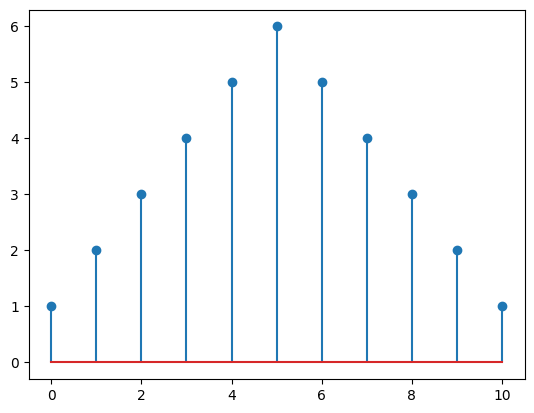

In [9]:
x_circle_conv = x_conv_inf[x_conv.shape[0]+1:x_conv.shape[0]+ (2*N)]
plt.stem(x_circle_conv)